In [2]:
pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [4]:
files.upload();

Saving vgames2.csv to vgames2 (5).csv


In [12]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
df = df.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [14]:
df.duplicated().sum()

1

In [15]:
df = df.drop_duplicates().reset_index(drop = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [22]:
df[df.NA_Sales.str.contains('[a-zA-Z]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16329,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16407,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09
16481,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
16491,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [17]:
df.sort_values('NA_Sales',ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13056,Mark Davis Pro Bass Challenge,PS2,2002.0,Sports,Natsume,90K,0.07,0,0.02
13797,King of Clubs: Mini Golf,Wii,2008.0,Sports,Oxygen Interactive,90K,0,0,0.01
14346,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
10649,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92
6248,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13
...,...,...,...,...,...,...,...,...,...
8625,Pro Yaky? Spirits 2011,PS3,2011.0,Sports,Konami Digital Entertainment,0,0,0.18,0
8618,Culdcept,3DS,2012.0,Misc,Nintendo,0,0,0.16,0
8611,Tales of VS.,PSP,2009.0,Fighting,Namco Bandai Games,0,0,0.23,0
8606,PachiPara 15: Super Umi Monogatari in Okinawa 2,PS3,2010.0,Misc,Irem Software Engineering,0,0,0.02,0


In [36]:
df.NA_Sales = df.NA_Sales.replace({'K': '/1e3', 'M':''}, regex = True).map(pd.eval).astype(float)
df.EU_Sales = df.EU_Sales.replace({'K': '/1e3', 'M':''}, regex = True).map(pd.eval).astype(float)
df.JP_Sales = df.JP_Sales.replace({'K': '/1e3', 'M':''}, regex = True).map(pd.eval).astype(float)
df.Other_Sales = df.Other_Sales.replace({'K': '/1e3', 'M':''}, regex = True).map(pd.eval).astype(float)

In [11]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,1994.242543,0.264667,0.146652,0.077782,0.048063
std,155.077168,0.816683,0.505351,0.309291,0.188588
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [23]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [24]:
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [25]:
look_up_df_Year = df[df.Year.notnull()].drop_duplicates(['Name']) 
look_up_df_Year = look_up_df_Year.set_index('Name')['Year']
df['Year'] = df['Year'].fillna(df['Name'].map(look_up_df_Year))

look_up_df_Genre = df[df.Genre.notnull()].drop_duplicates(['Name']) 
look_up_df_Genre = look_up_df_Genre.set_index('Name')['Genre']
df['Genre'] = df['Genre'].fillna(df['Name'].map(look_up_df_Genre))

look_up_df_Pub = df[df.Publisher.notnull()].drop_duplicates(['Name']) 
look_up_df_Pub = look_up_df_Pub.set_index('Name')['Publisher']
df['Publisher'] = df['Publisher'].fillna(df['Name'].map(look_up_df_Pub))

df.isnull().sum()

Name             0
Platform         0
Year           146
Genre           30
Publisher       51
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [41]:
df_clean = df.dropna()
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [42]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16386.000000,16386.000000,16386.000000,16386.000000,16386.000000
mean,1994.170267,0.265193,0.147257,0.077711,0.048197
std,155.577284,0.820049,0.506709,0.308040,0.189023
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [43]:
df_clean.sort_values('Year',ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02
5310,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00
15232,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00
10106,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00
5154,Batman: A Telltale Game Series,PS3,2016.0,Adventure,Telltale Games,0.00,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.60,0.00,0.20
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0.00,0.09
14665,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01
9275,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.00,0.00,0.20,0.00


In [44]:
df_clean.drop(df_clean.query('Year > 2016').index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df_clean.query('0 <= Year <1000')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15984,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00
16102,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00,0.00
16148,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16393,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [46]:
less30year_idx = df_clean.query('Year < 30').index
bigger30year_idx = df_clean.query('30 <= Year < 100').index
less30year_idx, bigger30year_idx

(Int64Index([   74,   213,   304,   768,  1015,  1220,  1364,  1409,  1684,
              2249,  2454,  2467,  2478,  2548,  2843,  3020,  3044,  3108,
              3746,  3879,  4010,  4076,  4319,  4727,  4746,  4800,  5193,
              5314,  5946,  6113,  6130,  6159,  6192,  6899,  7055,  7178,
              7184,  7362,  7555,  7600,  7627,  7845,  8144,  8191,  8509,
              8550,  8583,  8681,  8765,  8839,  8912,  8928,  9080,  9275,
              9290,  9325,  9889, 10356, 10404, 10405, 10620, 10810, 10921,
             11162, 11235, 11262, 11518, 11959, 12381, 12494, 12635, 12868,
             13738, 14160, 14665, 15244, 15259, 15262, 15441, 15446, 15487,
             15510, 15611, 15835, 16102, 16148, 16393],
            dtype='int64'),
 Int64Index([   81,   906,  2429,  3492,  4365,  4807,  4839, 10314, 10704,
             11333, 14571, 14784, 15984, 16481],
            dtype='int64'))

In [47]:
df_clean.Year.loc[less30year_idx] += 2000
df_clean.Year.loc[bigger30year_idx] += 1900

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
df_clean['Year'] = df_clean.Year.astype(str).str.slice(start=0, stop=4).astype(int)
df_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [49]:
df_clean['Sales'] = df_clean.NA_Sales + df_clean.EU_Sales + df_clean.JP_Sales + df_clean.Other_Sales
df_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16593,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16594,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16595,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [27]:
df_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
count,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000
mean,2006.409657,0.265242,0.147293,0.077727,0.048208,0.538469
std,5.819161,0.820141,0.506766,0.308076,0.189045,1.558602
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


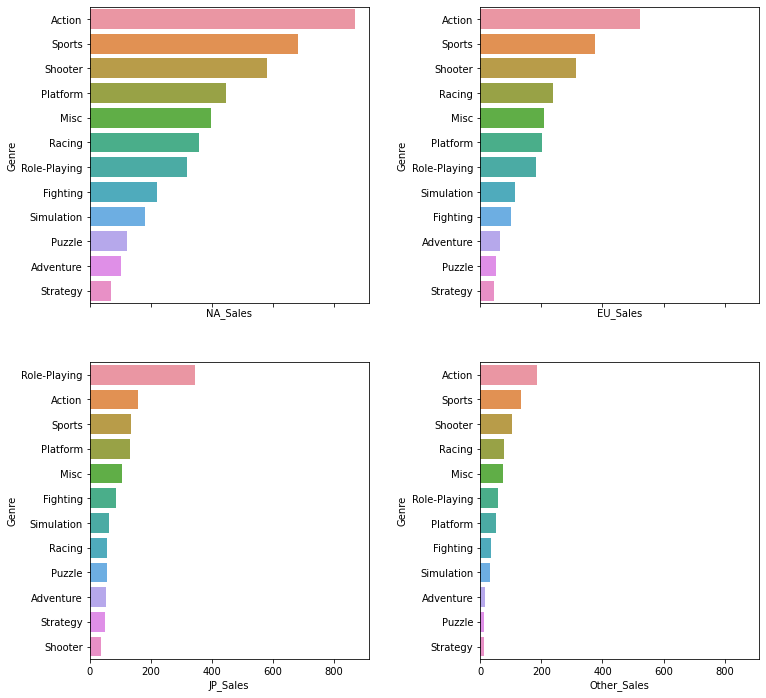

In [90]:
fig, axis = plt.subplots(2, 2, sharex = True, figsize=(12,12))
plt.subplots_adjust(wspace = 0.4)

NA_Sales_Genre = pd.DataFrame(df_clean.groupby("Genre")['NA_Sales'].sum()).sort_values('NA_Sales',ascending = False)
sns.barplot(ax = axis[0,0], data = NA_Sales_Genre, x = 'NA_Sales', y = NA_Sales_Genre.index);

EU_Sales_Genre = pd.DataFrame(df_clean.groupby("Genre")['EU_Sales'].sum()).sort_values('EU_Sales',ascending = False)
sns.barplot(ax = axis[0,1], data = EU_Sales_Genre, x = 'EU_Sales', y = EU_Sales_Genre.index);

JP_Sales_Genre = pd.DataFrame(df_clean.groupby("Genre")['JP_Sales'].sum()).sort_values('JP_Sales',ascending = False)
sns.barplot(ax = axis[1][0], data = JP_Sales_Genre, x = 'JP_Sales', y = JP_Sales_Genre.index);

Other_Sales_Genre = pd.DataFrame(df_clean.groupby("Genre")['Other_Sales'].sum()).sort_values('Other_Sales',ascending = False)
sns.barplot(ax = axis[1][1], data = Other_Sales_Genre, x = 'Other_Sales', y = Other_Sales_Genre.index);

In [91]:
display(NA_Sales_Genre)
display(EU_Sales_Genre)
display(JP_Sales_Genre)
display(Other_Sales_Genre)

,NA_Sales
Genre,
Action,869.98
Sports,680.60
Shooter,580.71
Platform,445.47
Misc,397.11
Racing,357.28
Role-Playing,318.84
Fighting,221.43
Simulation,181.61


,EU_Sales
Genre,
Action,521.90
Sports,375.64
Shooter,312.89
Racing,236.82
Misc,208.92
Platform,201.12
Role-Playing,183.16
Simulation,113.05
Fighting,100.18


,JP_Sales
Genre,
Role-Playing,343.38
Action,156.60
Sports,135.10
Platform,130.53
Misc,105.20
Fighting,87.15
Simulation,63.54
Racing,56.33
Puzzle,56.24


,Other_Sales
Genre,
Action,186.36
Sports,134.60
Shooter,102.59
Racing,76.93
Misc,72.93
Role-Playing,56.79
Platform,51.46
Fighting,36.24
Simulation,31.35


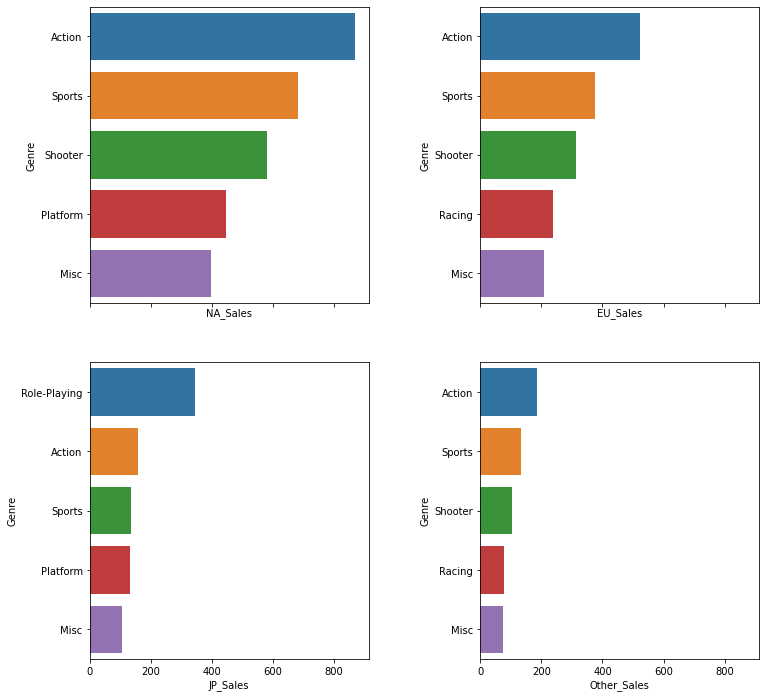

In [52]:
fig, axis = plt.subplots(2, 2, sharex = True, figsize=(12,12))
plt.subplots_adjust(wspace = 0.4)

sns.barplot(ax = axis[0,0], data = NA_Sales_Genre.iloc[0:5,:], x = 'NA_Sales', y = NA_Sales_Genre.index[0:5]);
sns.barplot(ax = axis[0,1], data = EU_Sales_Genre.iloc[0:5,:], x = 'EU_Sales', y = EU_Sales_Genre.index[0:5]);
sns.barplot(ax = axis[1,0], data = JP_Sales_Genre.iloc[0:5,:], x = 'JP_Sales', y = JP_Sales_Genre.index[0:5]);
sns.barplot(ax = axis[1,1], data = Other_Sales_Genre.iloc[0:5,:], x = 'Other_Sales', y = Other_Sales_Genre.index[0:5]);

In [51]:
genre_country = pd.DataFrame(df_clean.groupby(['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum())
genre_country = genre_country.T
genre_country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,869.98,101.79,221.43,397.11,445.47,122.17,357.28,318.84,580.71,181.61,680.60,68.20
EU_Sales,521.90,63.70,100.18,208.92,201.12,50.52,236.82,183.16,312.89,113.05,375.64,45.05
JP_Sales,156.60,51.92,87.15,105.20,130.53,56.24,56.33,343.38,38.20,63.54,135.10,49.13
Other_Sales,186.36,16.70,36.24,72.93,51.46,12.49,76.93,56.79,102.59,31.35,134.60,11.30


In [52]:
chi2_val, p ,dof, expected = chi2_contingency(genre_country, correction = False)
print('P-value: ',p)

P-value:  9.226068336142265e-125


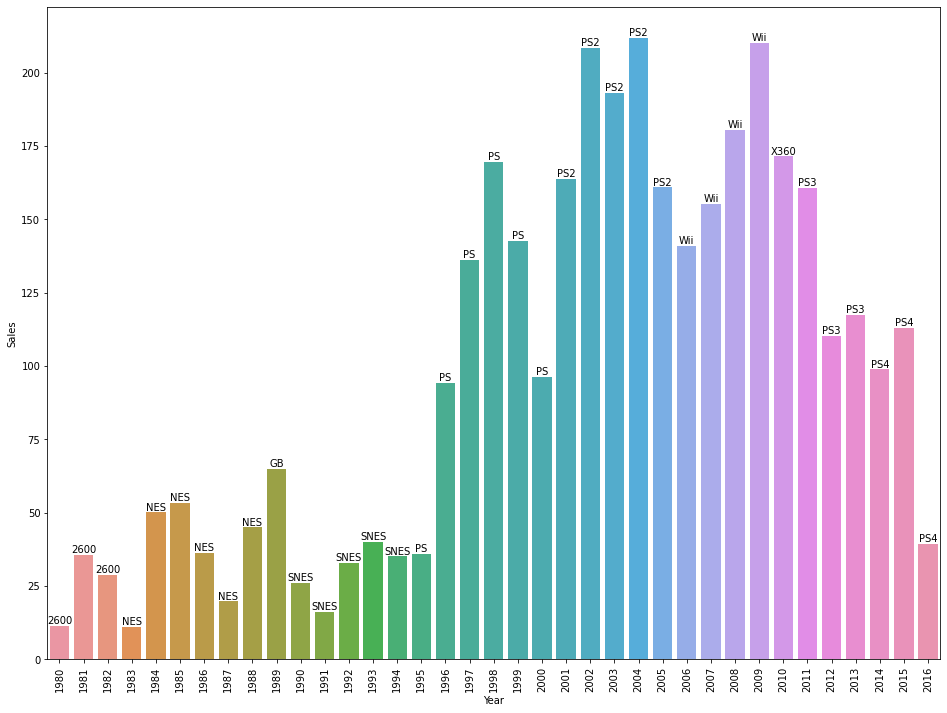

In [93]:
plt.figure(figsize=(16,12))
df_sales_platform = pd.DataFrame(df_clean.groupby(['Year','Platform'])['Sales'].sum())
df_sales_platform = df_sales_platform.unstack()
df_sales_platform = df_sales_platform.T
df_sales_platform = df_sales_platform.droplevel(axis = 0, level = 0)
maxs_platform=pd.DataFrame({'Platform':df_sales_platform.idxmax(),'Sales':df_sales_platform.max(axis = 0)})
maxs_platform.reset_index(inplace = True)
sns.barplot(data = maxs_platform, x = 'Year', y ='Sales');
for i in range(len(maxs_platform)):
  plt.text(i,maxs_platform.Sales[i], maxs_platform.Platform[i], horizontalalignment='center',verticalalignment='bottom')
plt.xticks(rotation = 90);
plt.show();

In [96]:
maxs_platform

,Year,Platform,Sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,NES,10.96
4,1984,NES,50.08
5,1985,NES,53.44
6,1986,NES,36.41
7,1987,NES,19.76
8,1988,NES,45.01
9,1989,GB,64.97


In [56]:
df_sales_platform1 = pd.DataFrame(df_clean.groupby(['Year','Platform'])['Sales'].sum())
df_sales_platform1 = df_sales_platform1.unstack()
df_sales_platform1 = df_sales_platform1.fillna(0)
#df_sales_platform1.iloc[:] = df_sales_platform1.iloc[:].cumsum()
df_sales_platform1 = df_sales_platform1.droplevel(axis = 1, level = 0)



In [57]:
bcr.bar_chart_race(df = df_sales_platform1,
                   n_bars = 10,
                   figsize=(3, 3),
                   sort='desc',
                   orientation = 'v',
                   steps_per_period = 20,
                   fixed_max = True,
                   period_length = 1200,
                   title='Sales')

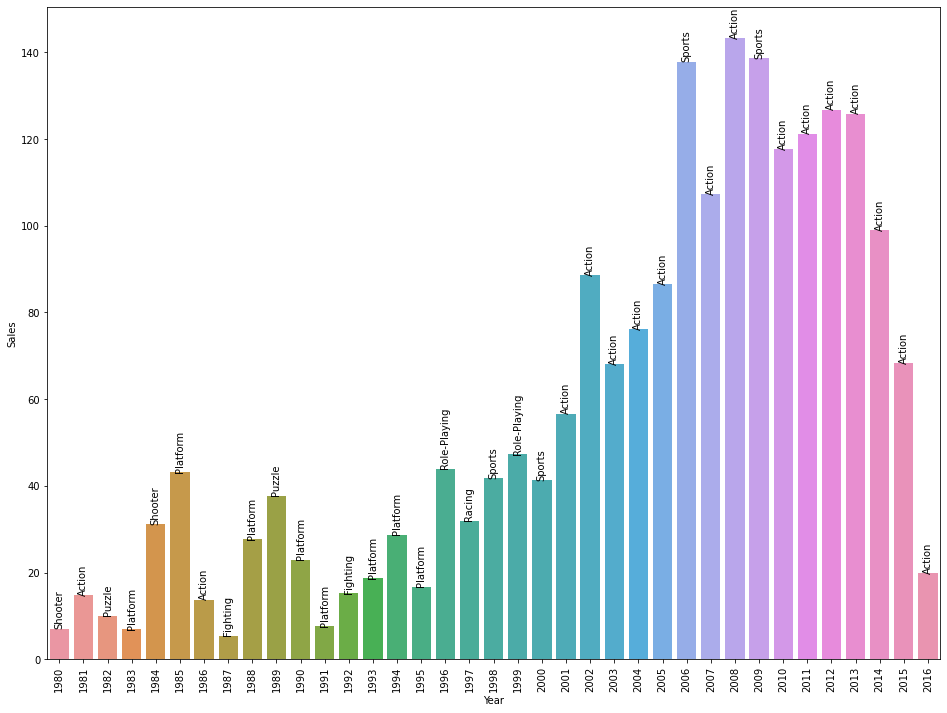

In [98]:
plt.figure(figsize=(16,12))
df_sales_genre = pd.DataFrame(df_clean.groupby(['Year','Genre'])['Sales'].sum())
df_sales_genre = df_sales_genre.unstack()
df_sales_genre = df_sales_genre.T
df_sales_genre = df_sales_genre.droplevel(axis = 0, level = 0)
maxs_genre=pd.DataFrame({'Genre':df_sales_genre.idxmax(),'Sales':df_sales_genre.max(axis = 0)})
maxs_genre.reset_index(inplace = True)
sns.barplot(data = maxs_genre, x = 'Year', y ='Sales');
for i in range(len(maxs_genre)):
  plt.text(i,maxs_genre.Sales[i], maxs_genre.Genre[i], horizontalalignment='center',verticalalignment='bottom', rotation = 90)
plt.xticks(rotation = 90);
plt.show();


In [99]:
maxs_genre

,Year,Genre,Sales
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


In [59]:
df_sales_genre1 = pd.DataFrame(df_clean.groupby(['Year','Genre'])['Sales'].sum())
df_sales_genre1 = df_sales_genre1.unstack()
df_sales_genre1 = df_sales_genre1.fillna(0)
#df_sales_genre1.iloc[:] = df_sales_genre1.iloc[:].cumsum()
df_sales_genre1 = df_sales_genre1.droplevel(axis = 1, level = 0)

In [60]:
bcr.bar_chart_race(df = df_sales_genre1, 
                   n_bars = 10,
                   figsize=(3, 3),
                   sort='desc',
                   orientation = 'v',
                   steps_per_period = 20,
                   fixed_max = True,
                   period_length = 1200,
                   title='Sales')

In [53]:
Sales_top10 = pd.DataFrame(df_clean.groupby(['Name','Genre','Publisher'])['Sales'].sum()).sort_values('Sales', ascending = False)[0:10]
NA_Sales_top10 = pd.DataFrame(df_clean.groupby(['Name','Genre','Publisher'])['NA_Sales'].sum()).sort_values('NA_Sales', ascending = False)[0:10]
EU_Sales_top10 = pd.DataFrame(df_clean.groupby(['Name','Genre','Publisher'])['EU_Sales'].sum()).sort_values('EU_Sales', ascending = False)[0:10]
JP_Sales_top10 = pd.DataFrame(df_clean.groupby(['Name','Genre','Publisher'])['JP_Sales'].sum()).sort_values('JP_Sales', ascending = False)[0:10]
Other_Sales_top10 = pd.DataFrame(df_clean.groupby(['Name','Genre','Publisher'])['Other_Sales'].sum()).sort_values('Other_Sales', ascending = False)[0:10]

display(Sales_top10)
display(NA_Sales_top10)
display(EU_Sales_top10)
display(JP_Sales_top10)
display(Other_Sales_top10)

,,,Sales
Name,Genre,Publisher,
Wii Sports,Sports,Nintendo,82.74
Grand Theft Auto V,Action,Take-Two Interactive,55.92
Super Mario Bros.,Platform,Nintendo,45.31
Tetris,Puzzle,Nintendo,35.84
Mario Kart Wii,Racing,Nintendo,35.83
Wii Sports Resort,Sports,Nintendo,33.00
Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31.38
Call of Duty: Black Ops,Shooter,Activision,31.04
Call of Duty: Modern Warfare 3,Shooter,Activision,30.84


,,,NA_Sales
Name,Genre,Publisher,
Wii Sports,Sports,Nintendo,41.49
Super Mario Bros.,Platform,Nintendo,32.48
Duck Hunt,Shooter,Nintendo,26.93
Tetris,Puzzle,Nintendo,26.17
Grand Theft Auto V,Action,Take-Two Interactive,23.46
Call of Duty: Black Ops,Shooter,Activision,17.59
Super Mario World,Platform,Nintendo,15.99
Mario Kart Wii,Racing,Nintendo,15.85
Wii Sports Resort,Sports,Nintendo,15.75


,,,EU_Sales
Name,Genre,Publisher,
Wii Sports,Sports,Nintendo,29.02
Grand Theft Auto V,Action,Take-Two Interactive,23.04
Mario Kart Wii,Racing,Nintendo,12.88
FIFA 15,Sports,Electronic Arts,12.40
Call of Duty: Modern Warfare 3,Shooter,Activision,11.29
FIFA 16,Sports,Electronic Arts,11.29
FIFA 14,Sports,Electronic Arts,11.14
Call of Duty: Black Ops II,Shooter,Activision,11.05
Wii Sports Resort,Sports,Nintendo,11.01


,,,JP_Sales
Name,Genre,Publisher,
Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,10.22
Pokemon Gold/Pokemon Silver,Role-Playing,Nintendo,7.20
Super Mario Bros.,Platform,Nintendo,6.96
New Super Mario Bros.,Platform,Nintendo,6.50
Pokemon Diamond/Pokemon Pearl,Role-Playing,Nintendo,6.04
Tetris,Puzzle,Nintendo,6.03
Pokemon Black/Pokemon White,Role-Playing,Nintendo,5.65
Pokemon Ruby/Pokemon Sapphire,Role-Playing,Nintendo,5.38
Animal Crossing: Wild World,Simulation,Nintendo,5.33


,,,Other_Sales
Name,Genre,Publisher,
Grand Theft Auto: San Andreas,Action,Take-Two Interactive,10.72
Wii Sports,Sports,Nintendo,8.46
Grand Theft Auto V,Action,Take-Two Interactive,8.03
Gran Turismo 4,Racing,Sony Computer Entertainment,7.53
Call of Duty: Black Ops II,Shooter,Activision,3.88
FIFA Soccer 08,Sports,Electronic Arts,3.53
Pro Evolution Soccer 2008,Sports,Konami Digital Entertainment,3.51
Call of Duty: Black Ops 3,Shooter,Activision,3.42
Call of Duty: Black Ops,Shooter,Activision,3.36


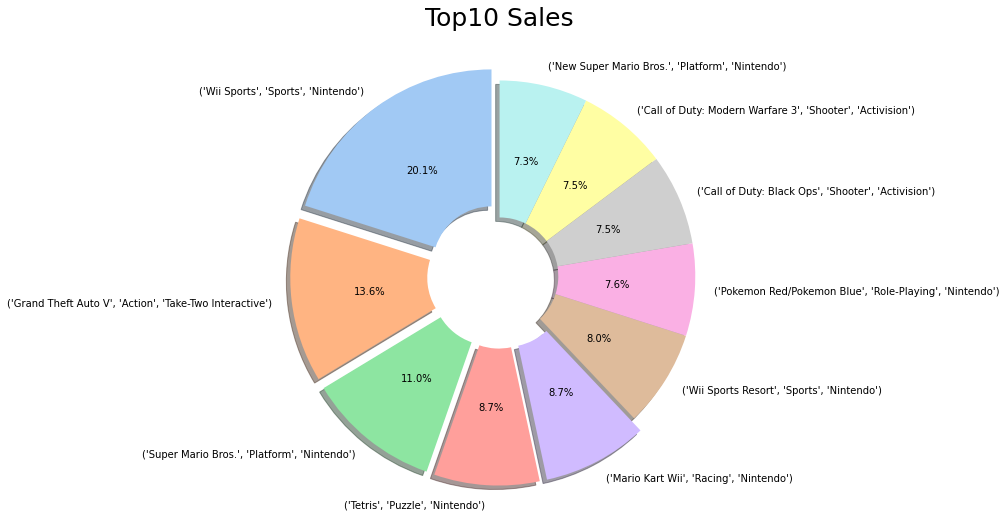

In [54]:
plt.figure(figsize = (12,9))
explode = np.repeat(0.07, 5)
explode = np.append(explode, np.repeat(0,5))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')[0:10]
plt.pie(Sales_top10['Sales'], labels = Sales_top10.index, startangle = 90, autopct='%.1f%%', explode = explode, shadow = True, wedgeprops = wedgeprops, colors = colors)
plt.title('Top10 Sales', fontsize = 25)
plt.show();

In [56]:
sales_top10_genre = pd.DataFrame(Sales_top10.groupby(['Genre'])['Sales'].sum().sort_values(ascending = False)[0:10])
sales_top10_genre

,Sales
Genre,
Sports,115.74
Platform,75.32
Shooter,61.88
Action,55.92
Puzzle,35.84
Racing,35.83
Role-Playing,31.38


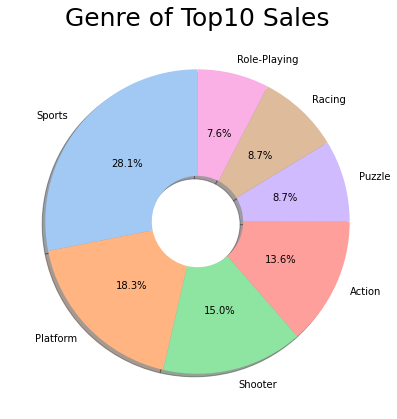

In [60]:
plt.figure(figsize = (7,7))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')[0:len(sales_top10_genre)]
plt.pie(sales_top10_genre['Sales'], labels = sales_top10_genre.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
plt.title('Genre of Top10 Sales', fontsize = 25)
plt.show();

In [58]:
sales_top10_pub = pd.DataFrame(Sales_top10.groupby(['Publisher'])['Sales'].sum().sort_values(ascending = False))
sales_top10_pub

,Sales
Publisher,
Nintendo,294.11
Activision,61.88
Take-Two Interactive,55.92


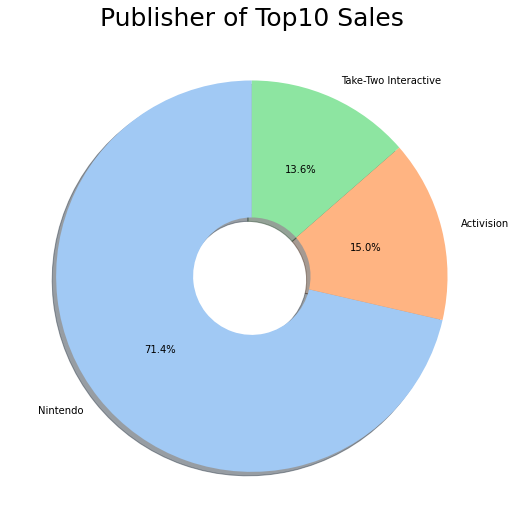

In [61]:
plt.figure(figsize = (12,9))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')[0:len(sales_top10_pub)]
plt.pie(sales_top10_pub['Sales'], labels = sales_top10_pub.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
plt.title('Publisher of Top10 Sales', fontsize = 25)
plt.show();

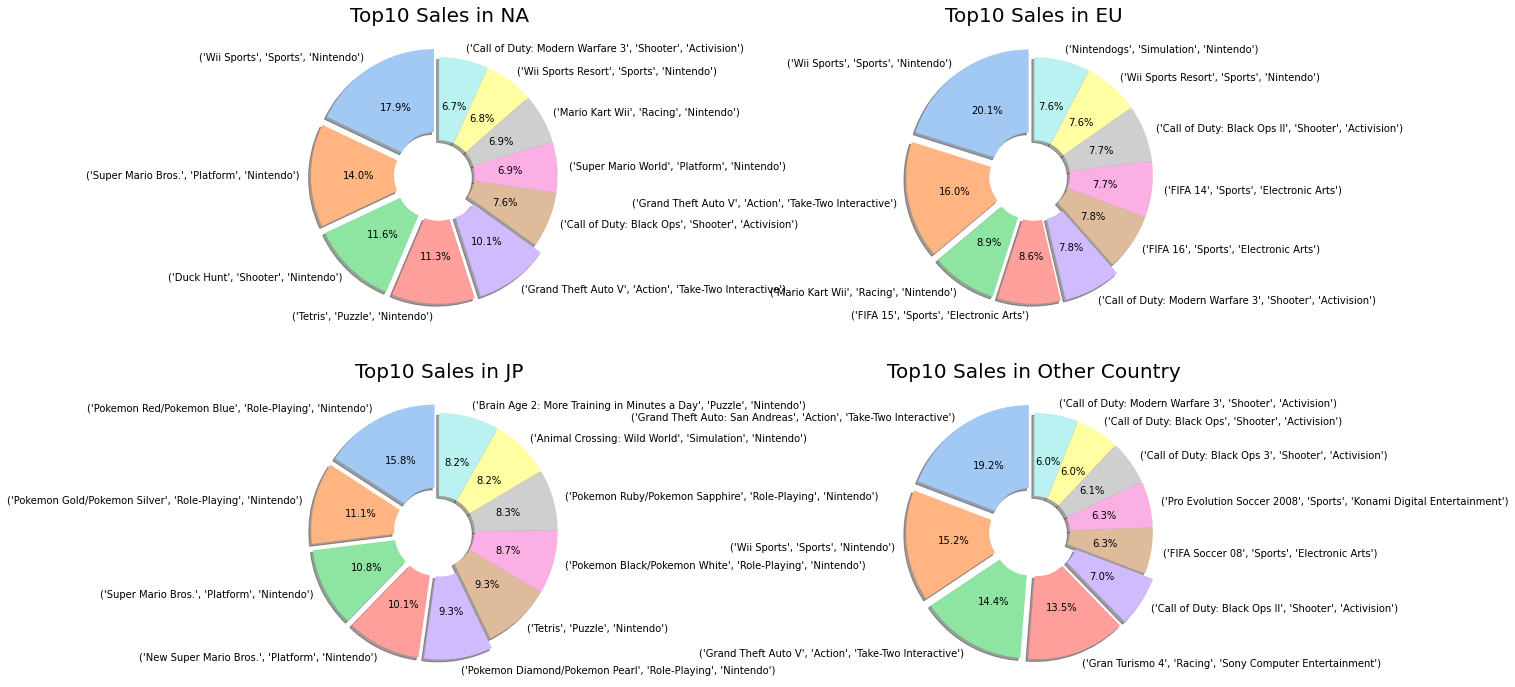

In [81]:
fig, axis = plt.subplots(2, 2, figsize=(16,12))
plt.subplots_adjust(wspace = 1)
explode = np.repeat(0.08, 5)
explode = np.append(explode, np.repeat(0,5))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')[0:10]
axis[0][0].pie( NA_Sales_top10['NA_Sales'], labels = NA_Sales_top10.index, startangle = 90, autopct='%.1f%%', explode = explode, shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][1].pie( EU_Sales_top10['EU_Sales'], labels = EU_Sales_top10.index, startangle = 90, autopct='%.1f%%', explode = explode, shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][0].pie( JP_Sales_top10['JP_Sales'], labels = JP_Sales_top10.index, startangle = 90, autopct='%.1f%%', explode = explode, shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][1].pie( Other_Sales_top10['Other_Sales'], labels = Other_Sales_top10.index, startangle = 90, autopct='%.1f%%', explode = explode, shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][0].set_title('Top10 Sales in NA', fontsize = 20)
axis[0][1].set_title('Top10 Sales in EU', fontsize = 20)
axis[1][0].set_title('Top10 Sales in JP', fontsize = 20)
axis[1][1].set_title('Top10 Sales in Other Country', fontsize = 20)
plt.show();

In [83]:
NA_sales_top10_genre = pd.DataFrame(NA_Sales_top10.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending = False)[0:10])
EU_sales_top10_genre = pd.DataFrame(EU_Sales_top10.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending = False)[0:10])
JP_sales_top10_genre = pd.DataFrame(JP_Sales_top10.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending = False)[0:10])
Other_sales_top10_genre = pd.DataFrame(Other_Sales_top10.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending = False)[0:10])
display(NA_sales_top10_genre)
display(EU_sales_top10_genre)
display(JP_sales_top10_genre)
display(Other_sales_top10_genre)

,NA_Sales
Genre,
Shooter,60.10
Sports,57.24
Platform,48.47
Puzzle,26.17
Action,23.46
Racing,15.85


,EU_Sales
Genre,
Sports,74.86
Action,23.04
Shooter,22.34
Racing,12.88
Simulation,11.00


,JP_Sales
Genre,
Role-Playing,34.49
Platform,13.46
Puzzle,11.35
Simulation,5.33


,Other_Sales
Genre,
Action,18.75
Sports,15.50
Shooter,14.01
Racing,7.53


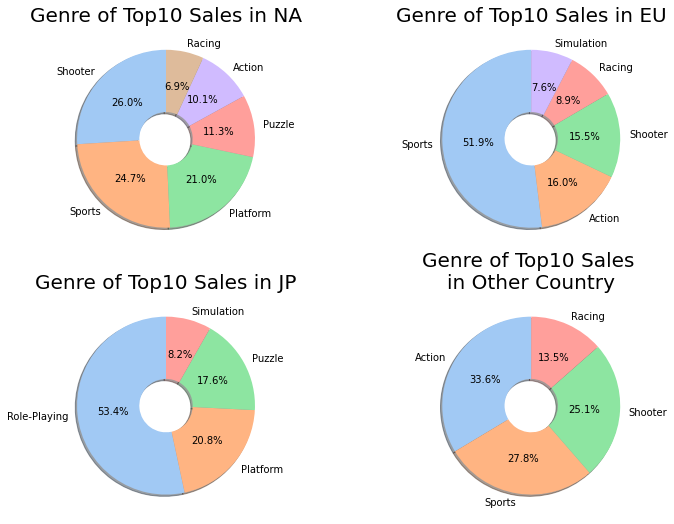

In [88]:
fig, axis = plt.subplots(2, 2, figsize=(12,9))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')
axis[0][0].pie(NA_sales_top10_genre['NA_Sales'], labels = NA_sales_top10_genre.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][1].pie(EU_sales_top10_genre['EU_Sales'], labels = EU_sales_top10_genre.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][0].pie(JP_sales_top10_genre['JP_Sales'], labels = JP_sales_top10_genre.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][1].pie(Other_sales_top10_genre['Other_Sales'], labels = Other_sales_top10_genre.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][0].set_title('Genre of Top10 Sales in NA', fontsize = 20)
axis[0][1].set_title('Genre of Top10 Sales in EU', fontsize = 20)
axis[1][0].set_title('Genre of Top10 Sales in JP', fontsize = 20)
axis[1][1].set_title('Genre of Top10 Sales \nin Other Country', fontsize = 20)
plt.show();

In [85]:
NA_sales_top10_pub = pd.DataFrame(NA_Sales_top10.groupby(['Publisher'])['NA_Sales'].sum().sort_values(ascending = False))
EU_sales_top10_pub = pd.DataFrame(EU_Sales_top10.groupby(['Publisher'])['EU_Sales'].sum().sort_values(ascending = False))
JP_sales_top10_pub = pd.DataFrame(JP_Sales_top10.groupby(['Publisher'])['JP_Sales'].sum().sort_values(ascending = False))
Other_sales_top10_pub = pd.DataFrame(Other_Sales_top10.groupby(['Publisher'])['Other_Sales'].sum().sort_values(ascending = False))

display(NA_sales_top10_pub)
display(EU_sales_top10_pub)
display(JP_sales_top10_pub)
display(Other_sales_top10_pub)

,NA_Sales
Publisher,
Nintendo,174.66
Activision,33.17
Take-Two Interactive,23.46


,EU_Sales
Publisher,
Nintendo,63.91
Electronic Arts,34.83
Take-Two Interactive,23.04
Activision,22.34


,JP_Sales
Publisher,
Nintendo,64.63


,Other_Sales
Publisher,
Take-Two Interactive,18.75
Activision,14.01
Nintendo,8.46
Sony Computer Entertainment,7.53
Electronic Arts,3.53
Konami Digital Entertainment,3.51


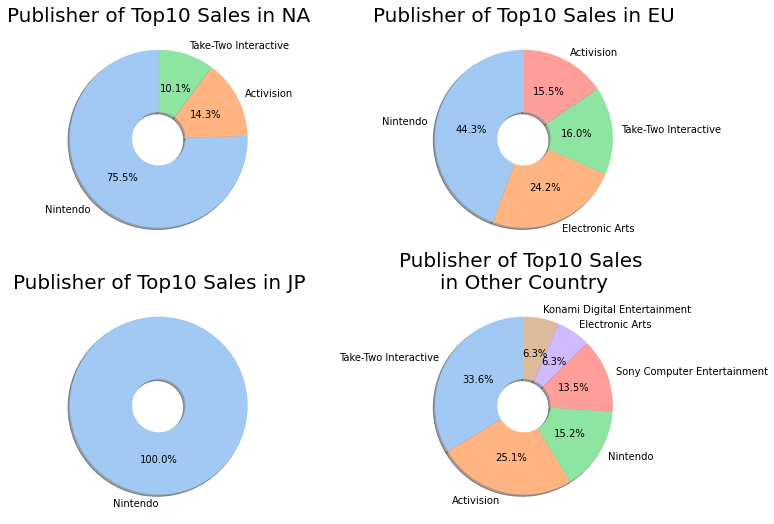

In [87]:
fig, axis = plt.subplots(2, 2, figsize=(12,9))
wedgeprops={'width': 0.7}
colors = sns.color_palette('pastel')
axis[0][0].pie(NA_sales_top10_pub['NA_Sales'], labels = NA_sales_top10_pub.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][1].pie(EU_sales_top10_pub['EU_Sales'], labels = EU_sales_top10_pub.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][0].pie(JP_sales_top10_pub['JP_Sales'], labels = JP_sales_top10_pub.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[1][1].pie(Other_sales_top10_pub['Other_Sales'], labels = Other_sales_top10_pub.index, startangle = 90, autopct='%.1f%%', shadow = True, wedgeprops = wedgeprops, colors = colors)
axis[0][0].set_title('Publisher of Top10 Sales in NA', fontsize = 20)
axis[0][1].set_title('Publisher of Top10 Sales in EU', fontsize = 20)
axis[1][0].set_title('Publisher of Top10 Sales in JP', fontsize = 20)
axis[1][1].set_title('Publisher of Top10 Sales \nin Other Country', fontsize = 20)
plt.show();

In [143]:
df_sales_genre2 = pd.DataFrame(df_clean.groupby(['Year','Genre'])['Sales'].sum())
df_sales_genre2 = df_sales_genre2.query('Year > 2011').sort_values(['Year','Sales'], ascending =  [True,False])
df_sales_genre2

Sales
Year Genre               
2012 Action        126.81
     Shooter        72.86
     Role-Playing   47.77
     Sports         30.90
     Misc           22.93
     Platform       18.54
     Racing         14.43
     Simulation     13.37
     Fighting        9.53
     Adventure       5.95
     Strategy        3.33
     Puzzle          1.74
2013 Action        125.84
     Shooter        62.73
     Sports         41.54
     Role-Playing   30.54
     Misc           25.90
     Platform       25.09
     Racing         13.02
     Simulation      8.68
     Fighting        7.23
     Adventure       6.61
     Strategy        6.32
     Puzzle          1.00
2014 Action         99.01
     Shooter        65.99
     Sports         46.64
     Role-Playing   45.89
     Misc           23.73
     Racing         16.71
     Fighting       16.15
     Platform        8.87
     Adventure       6.09
     Simulation      5.54
     Puzzle          1.50
     Strategy        0.97
2015 Action         68.25
     Shooter        66.12
     Sports         41.49
     Role-Playing   36.43
     Misc           11.66
     Adventure       8.03
     Racing          7.92
     Fighting        7.78
     Platform        6.05
     Simulation      5.61
     Strategy        1.82
     Puzzle          0.69
2016 Action         19.84
     Shooter        18.17
     Sports         14.63
     Role-Playing    6.75
     Fighting        3.85
     Platform        2.08
     Adventure       1.79
     Racing          1.67
     Misc            1.15
     Strategy        0.52
     Simulation      0.39

In [108]:
df_sales_platform2 = pd.DataFrame(df_clean.groupby(['Year','Platform'])['Sales'].sum())
df_sales_platform2 = df_sales_platform2.query('Year > 2011').sort_values(['Year','Sales'], ascending =  [True,False])
df_sales_platform2

Sales
Year Platform        
2012 PS3       110.38
     X360      101.82
     3DS        51.51
     Wii        24.14
     PC         23.73
     PSV        18.59
     WiiU       17.79
     DS         12.27
     PSP         7.93
2013 PS3       117.42
     X360       89.56
     3DS        41.51
     PS4        24.76
     WiiU       21.81
     XOne       18.61
     PC         13.43
     PSV        12.63
     Wii         9.38
     PSP         3.43
     DS          1.96
2014 PS4        98.83
     XOne       52.44
     PS3        50.97
     3DS        43.11
     X360       36.43
     WiiU       22.54
     PSV        14.75
     PC         13.33
     Wii         4.43
     PSP         0.24
     DS          0.02
2015 PS4       112.86
     XOne       57.67
     3DS        26.97
     PS3        18.18
     WiiU       16.37
     X360       13.02
     PC          8.03
     PSV         7.07
     Wii         1.56
     PSP         0.12
2016 PS4        39.30
     XOne       12.38
     3DS         6.55
     PSV         3.35
     WiiU        3.28
     PC          2.60
     PS3         2.55
     X360        0.83